## Model Training
#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [26]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [27]:
df=pd.read_csv('students.csv')

#### Show Top 5 Records


In [28]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())







Missing values before handling:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [30]:
# Fill missing values in numerical columns with the mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.mean()))

# Check for missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [31]:
# Fill missing values in categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check for missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [32]:
print(df['reading_score'].min())

17


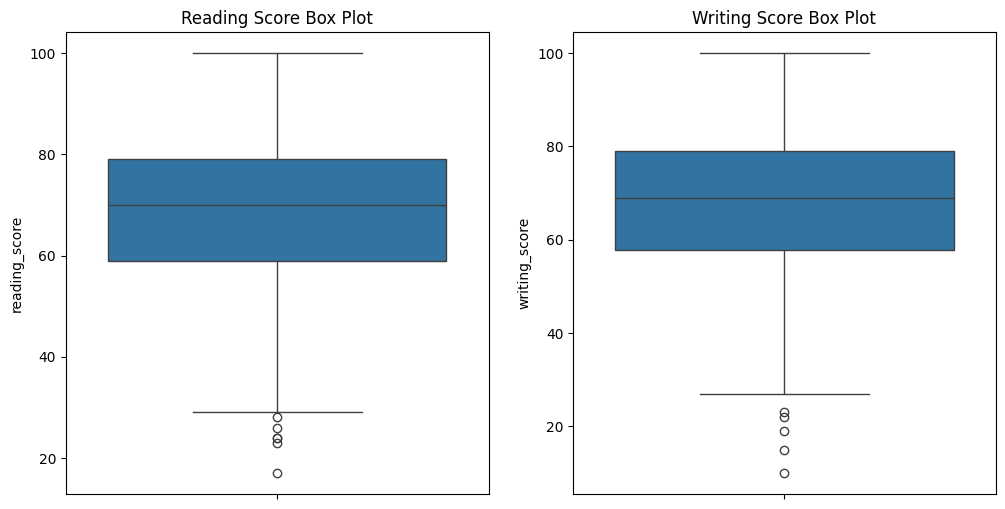

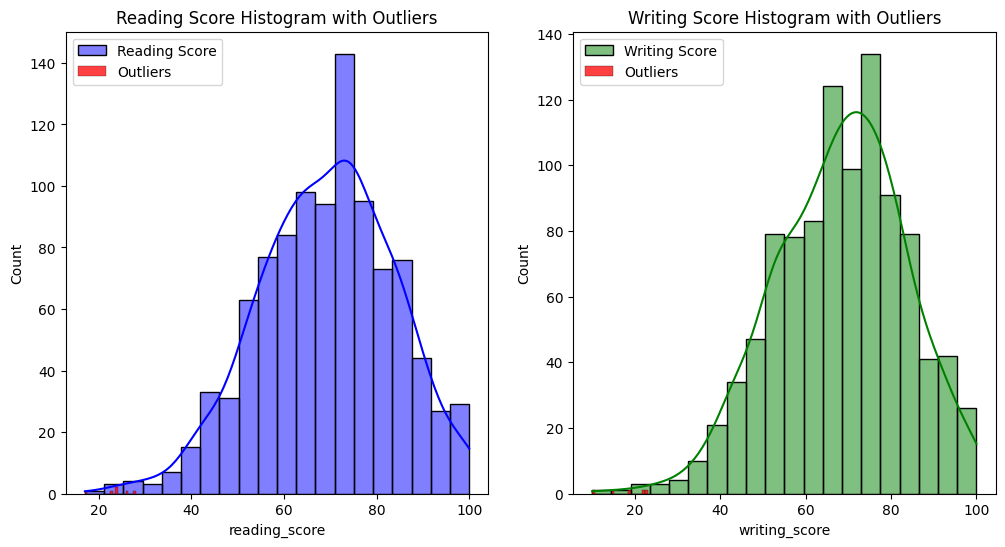

In [33]:
# Calculate Q1, Q3, and IQR for reading and writing scores
Q1_reading = df['reading_score'].quantile(0.25)
Q3_reading = df['reading_score'].quantile(0.75)
IQR_reading = Q3_reading - Q1_reading

Q1_writing = df['writing_score'].quantile(0.25)
Q3_writing = df['writing_score'].quantile(0.75)
IQR_writing = Q3_writing - Q1_writing

# Calculate bounds for outliers
lower_bound_reading = Q1_reading - 1.5 * IQR_reading
upper_bound_reading = Q3_reading + 1.5 * IQR_reading
lower_bound_writing = Q1_writing - 1.5 * IQR_writing
upper_bound_writing = Q3_writing + 1.5 * IQR_writing

# Detect outliers
outliers_reading = df[(df['reading_score'] < lower_bound_reading) | (df['reading_score'] > upper_bound_reading)]
outliers_writing = df[(df['writing_score'] < lower_bound_writing) | (df['writing_score'] > upper_bound_writing)]

# Visualize with box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['reading_score'])
plt.title('Reading Score Box Plot')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['writing_score'])
plt.title('Writing Score Box Plot')
plt.show()

# Visualize with histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['reading_score'], bins=20, kde=True, color='blue', label='Reading Score')
sns.histplot(outliers_reading['reading_score'], bins=20, color='red', label='Outliers')
plt.title('Reading Score Histogram with Outliers')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df['writing_score'], bins=20, kde=True, color='green', label='Writing Score')
sns.histplot(outliers_writing['writing_score'], bins=20, color='red', label='Outliers')
plt.title('Writing Score Histogram with Outliers')
plt.legend()
plt.show()




In [34]:
# Filter out outliers
df_no_outliers = df[
    (df['reading_score'] >= lower_bound_reading) & (df['reading_score'] <= upper_bound_reading) &
    (df['writing_score'] >= lower_bound_writing) & (df['writing_score'] <= upper_bound_writing)
]

In [35]:
df_no_outliers.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
df_no_outliers['reading_score'].min()

np.int64(29)

#### Preparing X and Y variables

In [37]:
X = df.drop(columns=['math_score'],axis=1)

In [38]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [39]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

               reading_score  writing_score
reading_score       1.000000       0.954598
writing_score       0.954598       1.000000


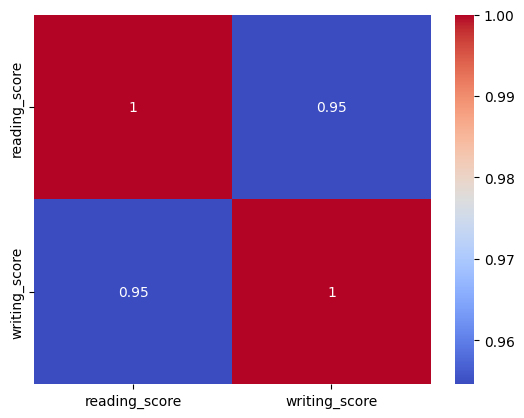

In [40]:
# Select numerical columns for correlation analysis
numerical_columns = ['reading_score', 'writing_score']  # Adjust based on your data

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Print correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [41]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [42]:
X=preprocessor.fit_transform(X)

In [43]:
X.shape

(1000, 19)

In [44]:
# Seperate train test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_test.shape,X_train.shape

((200, 19), (800, 19))

#### Create an Evaluation function to give all metrices after model training

In [45]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

In [47]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,AdaBoost Regressor,0.849175
5,Random Forest Regressor,0.849132
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.759306


In [48]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    "Linear Regression": {},
    "Lasso": {'alpha': [0.01, 0.1, 1, 10, 100]},
    "Ridge": {'alpha': [0.01, 0.1, 1, 10, 100]},
    "K-Neighbors Regressor": {'n_neighbors': [3, 5, 7, 9]},
    "Decision Tree": {'max_depth': [None, 10, 20, 30, 40, 50]},
    "Random Forest Regressor": {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    "XGBRegressor": {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    # "CatBoosting Regressor": {'iterations': [100, 200], 'depth': [6, 8, 10], 'learning_rate': [0.01, 0.1]},
    "AdaBoost Regressor": {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

model_list = []
r2_list = []

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    # Set up GridSearchCV with the parameter grid
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)  # Train model
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f"Best parameters for {model_name}: {best_params}")
    # Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Tuning hyperparameters for Linear Regression...
Best parameters for Linear Regression: {}
Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Tuning hyperparameters for Lasso...
Best parameters for Lasso: {'alpha': 0.01}
Lasso
Model performance for Training set
- Root Mean Squared Error: 5.3240
- Mean Absolute Error: 4.2664
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3837
- Mean Absolute Error: 4.2046
- R2 Score: 0.8809


Tuning hyperparameters for Ridge...
Best parameters for Ridge: {'alpha': 1}
Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- R

c:\Users\bisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

## Results

In [49]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,0.880888
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.856619
3,K-Neighbors Regressor,0.789720
4,Decision Tree,0.751944


### Linear Regression

In [50]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


In [51]:
model=Lasso(alpha=0.01)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 88.09


In [52]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import joblib

# Train the model
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the accuracy
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

# Save the model
import pickle

# Save preprocessor
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

# Save model
with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model and preprocessor saved as .pkl files!")



Accuracy of the model is 88.09
Model and preprocessor saved as .pkl files!


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

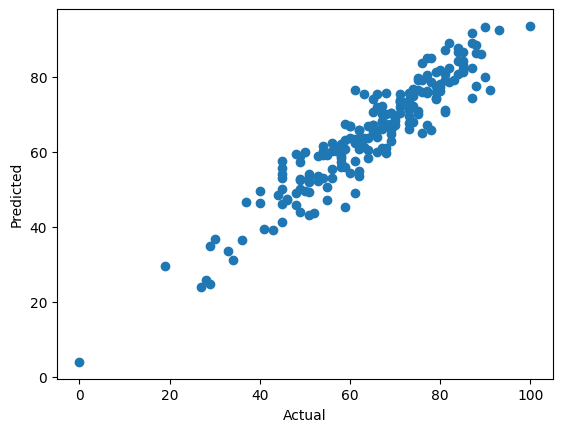

In [53]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


<Axes: xlabel='math_score'>

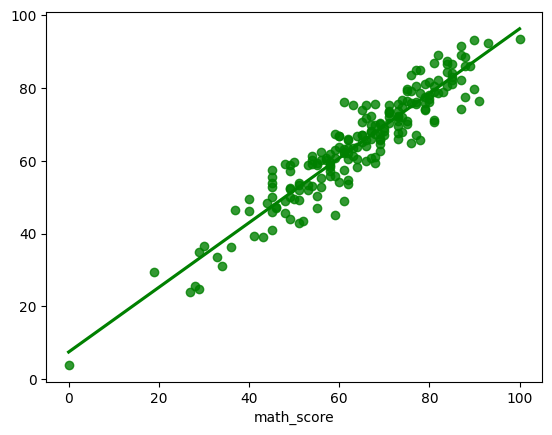

In [54]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='green')

### Difference between Actual and Predicted Values

In [55]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference
521,91,76.427663,14.572337
737,53,58.810471,-5.810471
740,80,77.072578,2.927422
660,74,76.771043,-2.771043
411,84,87.525456,-3.525456
...,...,...,...
408,52,43.540756,8.459244
332,62,62.203209,-0.203209
208,74,67.804544,6.195456
613,65,67.099652,-2.099652
